# Predictiong the likely hood of Surviving in Titantic shipwreak
this notebook will use python-based Machine learning models to predict whether a passenger servivides the shipwreck or not.

## 1. Problem Definition:
> given a passenger features, can we predict wheter a passenger can survive the titanic shipwreck or not ? 

## 2. Data.
the original data came from kaggle look at for more info URL:https://www.kaggle.com/competitions/titanic/data
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


## 3. Evalution
the evalution matrice for this problem is going to be accuracy: which is going to correct predicted fining of passengers.

## 4. Features:
Kaggle provides a data dictory detailing what each feature means, those can be found in the URL:
https://www.kaggle.com/competitions/titanic/data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### first lets discover our data and try to find some relastionships and even use confusion matrix to discover it.

In [2]:
df = pd.read_csv("./data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### survivied is the class i am trying to predict in this case

let's compare sex and survivially of passengers.

In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [207]:
countsSex = df.groupby('Survived')['Sex'].value_counts().unstack()

In [208]:
countsSex

Sex,female,male
Survived,,
0,81,468
1,233,109


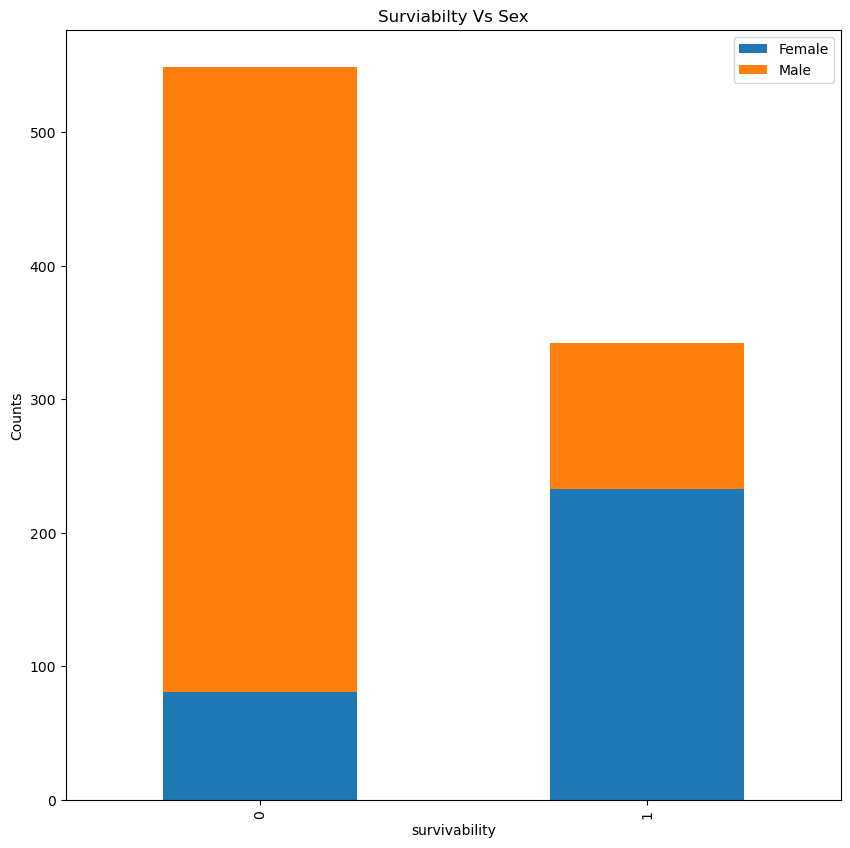

In [209]:
fig,ax = plt.subplots(figsize = (10,10))
countsSex.plot(kind = "bar", stacked = True,ax = ax)
ax.set(title= "Surviabilty Vs Sex", xlabel = "survivability", ylabel ="Counts")
plt.legend(["Female", "Male"])
plt.show()

##### We can see that females are more likely to survive the titanicy sinking

### Making a Confusion Matrix for our data

In [210]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [211]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [212]:
corr_matrix = df.corr()

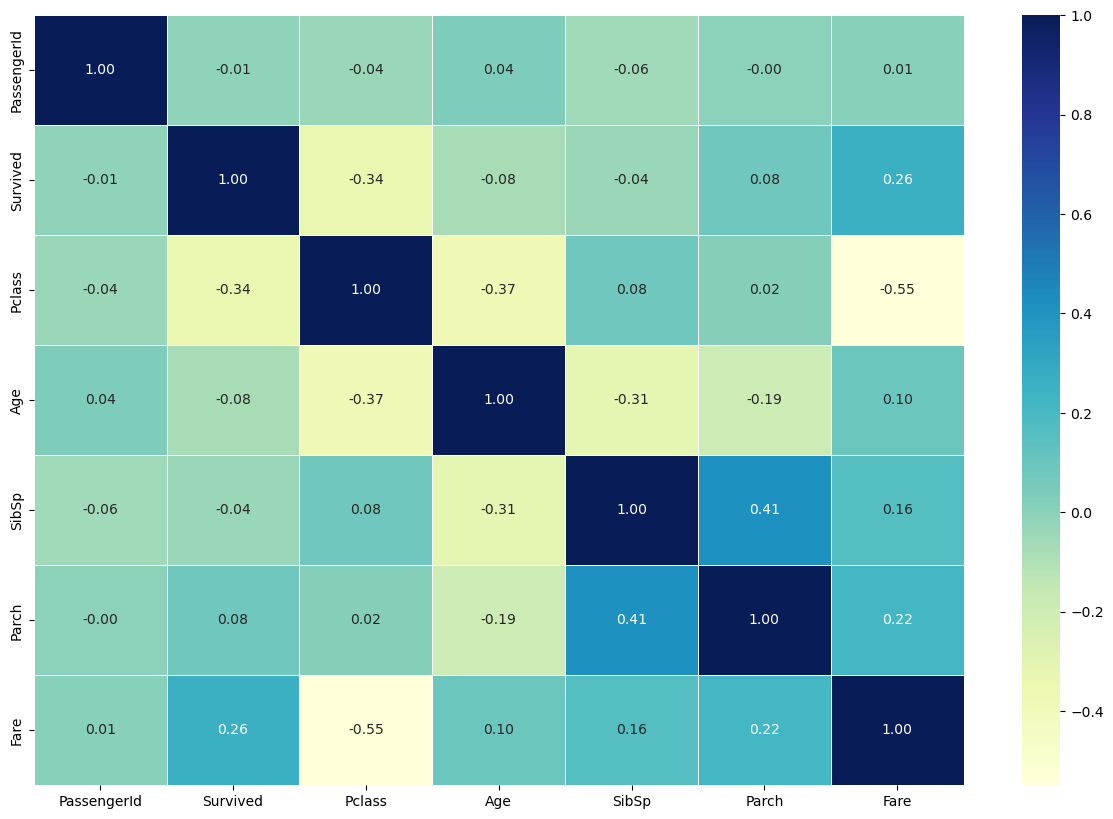

In [214]:
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot = True,linewidths=0.5,fmt = ".2f", cmap="YlGnBu");


### now let's fix our data and put all in numbers to train it into a model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_tmp = df.copy()

lets fill up the data that is numberic with medium

In [10]:
# filling numbers 
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # check for null values of numberic
            # add binary column which tells us whether that data actually missing
            df_tmp[label + "is_missing"] = pd.isnull(content)
            # fill missing numebric data 
            df_tmp[label] = content.fillna(content.median)

##### now if the data is not numberic we are going to fill with with its code but also we are going to add a codes for that NaN value

In [11]:
# fill non numberic data and put non numebric data into discrete data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a colum showing we have data missing in a certain column
        df_tmp[label+"is_missing"] = pd.isnull(content)
        # now put tat data into categorical order and add a 1 to it
        df_tmp[label] = pd.Categorical(content).codes+1

In [12]:
for label, content in df_tmp.items():
    if label.find("is_missing") != -1:
        df_tmp[label] = df_tmp[label].astype("category").cat.codes

In [9]:
### lets make a function that fixes our data to be used for train and test set

def preprocess_data(df):
    """
    this functions returns a dataframe that fixes the data.
    it will deal with missing values in our data and convert non-numeric values to be numeric
    """
    df_tmp = df.copy()
    
    if "Survived" in df_tmp.columns:
        df_tmp.drop("Survived",axis = 1 , inplace = True)
    # filling numbers 
    for label,content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            
            if pd.isnull(content).sum(): # check for null values of numberic
                # add binary column which tells us whether that data actually missing
                df_tmp[label + "_is_missing"] = pd.isnull(content)
                # fill missing numebric data 
                df_tmp[label] = content.fillna(content.median())
            print(label)
        else:
            # add a colum showing we have data missing in a certain column
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # now put tat data into categorical order and add a 1 to it
            df_tmp[label] = pd.Categorical(content).codes+1
    
    for label, content in df_tmp.items():
        if label.find("_is_missing") != -1:
            df_tmp[label] = df_tmp[label].astype("category").cat.codes
    
    ## return the fixed dataFrame
    return df_tmp
    

In [14]:
df_tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ageis_missing',
       'Nameis_missing', 'Sexis_missing', 'Ticketis_missing',
       'Cabinis_missing', 'Embarkedis_missing'],
      dtype='object')

### now that we have got our data ready let's split it into test and traingset


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(df_tmp.drop("Survived",axis = 1),df_tmp["Survived"],test_size = 0.2)

now that we've got our data splited into train and test set lets try to put in it into our model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [20]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [21]:
score= accuracy_score(y_test,y_pred)
score

0.8435754189944135

now lets use grid serach cv and make some hyperparameter tuning. 



In [22]:
%%time
from sklearn.model_selection import GridSearchCV
rf_grid = {
    "n_estimators":np.arange(10,200,10),
    "max_depth":[None,3,5,10],
    "min_samples_split": np.arange(2,10,2)
}
rc_model = GridSearchCV(RandomForestClassifier(n_jobs = -1,
                                              random_state = 42),param_grid = rf_grid,
                       cv = 5,
                       verbose = True)
rc_model.fit(x_train,y_train)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


KeyboardInterrupt: 

In [ ]:
rc_model.best_params_

In [ ]:
y_pred = rc_model.predict(x_test)
len(y_pred), len(y_test)

In [ ]:
score = accuracy_score(y_test,y_pred)
score

In [ ]:
%%time
### Now lets use RandsomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                    random_state = 42),
                             param_distributions=rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)
# now fit our model 
rs_model.fit(x_train,y_train)

In [ ]:
accuracy_score(y_test,rs_model.predict(x_test))

### Fixing pre-process data function

In [147]:
### lets make a function that fixes our data to be used for train and test set

def preprocess_data(df):
    """
    this functions returns a dataframe that fixes the data.
    it will deal with missing values in our data and convert non-numeric values to be numeric
    """
    df_tmp = df.copy()
    
    if "Survived" in df_tmp.columns:
        df_tmp.drop("Survived",axis = 1 , inplace = True)
    # filling numbers 
    for label,content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): # check for null values of numberic
                # add binary column which tells us whether that data actually missing
                df_tmp[label + "_is_missing"] = pd.isnull(content)
                # fill missing numebric data 
                df_tmp[label] = content.fillna(content.median())
            print(label)
        else:
            # add a colum showing we have data missing in a certain column
            if pd.isnull(content).sum():
                df_tmp[label+"_is_missing"] = pd.isnull(content)
            # now put tat data into categorical order and add a 1 to it
            df_tmp[label] = pd.Categorical(content).codes+1
    
    ## return the fixed dataFrame
    return df_tmp
    

In [153]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
x_train,y_train = preprocess_data(train),train["Survived"]
fixed_test = preprocess_data(test)

# modifiy fare_is_missing column manually
x_train["Fare_is_missing"] = False
fixed_test["Embarked_is_missing"] = False

fixed_test = fixed_test.reindex(columns=x_train.columns)
# merge labels and features of training set
x_train["Survived"] = y_train
fixed_train = x_train

PassengerId
Pclass
Age
SibSp
Parch
Fare
PassengerId
Pclass
Age
SibSp
Parch
Fare


In [218]:
fixed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    int16  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    bool   
 12  Cabin_is_missing     891 non-null    bool   
 13  Embarked_is_missing  891 non-null    bool   
 14  Fare_is_missing      891 non-null    bool   
 15  Survived             891 non-null    int

## confusion matrix after fixing data:

In [223]:
df_train = fixed_train.copy()
for i in df_train.columns:
    if "is_miss" in i:
        df_train.pop(i)

In [224]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    int16  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int16  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int16  
 10  Embarked     891 non-null    int8   
 11  Survived     891 non-null    int64  
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


(12.5, -0.5)

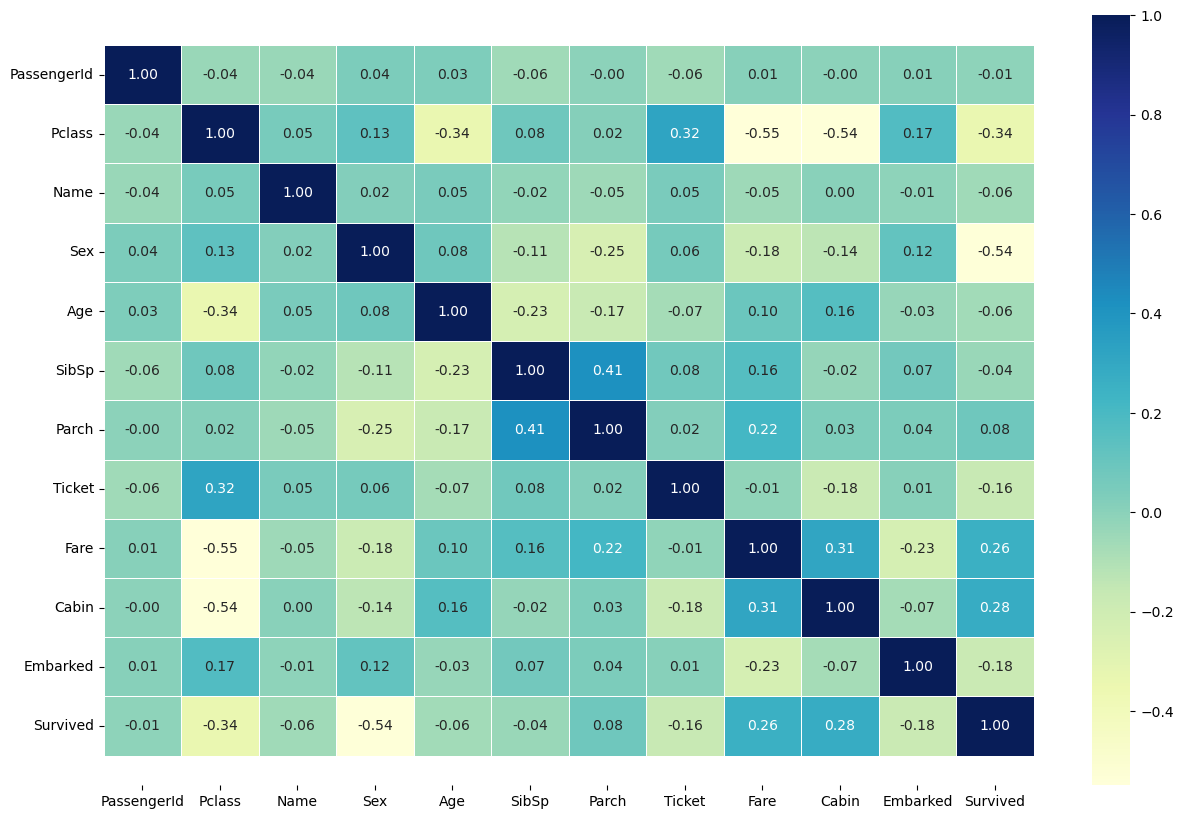

In [228]:
corr_matrix = df_train.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot = True,linewidths=0.5,fmt = ".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [227]:
corr_matrix

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985,-0.005007
Pclass,-0.035144,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,-0.338481
Name,-0.038559,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633,-0.057343
Sex,0.042939,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,-0.543351
Age,0.034212,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903,-0.064910
SibSp,-0.057527,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,-0.035322
Parch,-0.001652,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,0.081629
Ticket,-0.056554,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,-0.164549
Fare,0.012658,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,0.257307
Cabin,-0.000637,-0.537419,0.003122,-0.137704,0.164550,-0.024829,0.033585,-0.176515,0.310987,1.000000,-0.070245,0.276235


In [149]:
np.setdiff1d(np.array(fixed_test.columns), np.intersect1d(np.array(x_train.columns),np.array(fixed_test.columns)))

array([], dtype=object)

In [110]:
x_train["Fare_is_missing"] = False
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Age_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Fare_is_missing
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,False,True,False,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False,False,False
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,False,False,False,False,True,False,False
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False,False,False
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,False,False,False,False,True,False,False


In [154]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    int16  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    bool   
 12  Cabin_is_missing     891 non-null    bool   
 13  Embarked_is_missing  891 non-null    bool   
 14  Fare_is_missing      891 non-null    bool   
 15  Survived             891 non-null    int

In [155]:
fixed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    int16  
 3   Sex                  418 non-null    int8   
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    int16  
 8   Fare                 418 non-null    float64
 9   Cabin                418 non-null    int8   
 10  Embarked             418 non-null    int8   
 11  Age_is_missing       418 non-null    bool   
 12  Cabin_is_missing     418 non-null    bool   
 13  Embarked_is_missing  418 non-null    bool   
 14  Fare_is_missing      418 non-null    bool   
dtypes: bool(4), float64(2), int16(2), int64(

### looking at our columns to feature engineer the data frame` 

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [98]:
fixed_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_is_missing',
       'Sex_is_missing', 'Age_is_missing', 'Ticket_is_missing',
       'Fare_is_missing', 'Cabin_is_missing', 'Embarked_is_missing'],
      dtype='object')

In [111]:
x_train["Survived"] = y_train
fixed_train = x_train

In [112]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [165]:
fixed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    int16  
 3   Sex                  418 non-null    int8   
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    int16  
 8   Fare                 418 non-null    float64
 9   Cabin                418 non-null    int8   
 10  Embarked             418 non-null    int8   
 11  Age_is_missing       418 non-null    bool   
 12  Cabin_is_missing     418 non-null    bool   
 13  Embarked_is_missing  418 non-null    bool   
 14  Fare_is_missing      418 non-null    bool   
dtypes: bool(4), float64(2), int16(2), int64(

In [166]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    int16  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    bool   
 12  Cabin_is_missing     891 non-null    bool   
 13  Embarked_is_missing  891 non-null    bool   
 14  Fare_is_missing      891 non-null    bool   
dtypes: bool(4), float64(2), int16(3), int64(

In [135]:
col = fixed_test.pop("Fare_is_missing")


In [126]:
fixed_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_is_missing',
       'Sex_is_missing', 'Age_is_missing', 'Ticket_is_missing',
       'Cabin_is_missing', 'Embarked_is_missing'],
      dtype='object')

In [134]:
len(fixed_test.columns)

18

In [136]:
fixed_test.insert(len(fixed_test.columns),"Fare_is_missing",col)

In [137]:
fixed_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_is_missing',
       'Sex_is_missing', 'Age_is_missing', 'Ticket_is_missing',
       'Cabin_is_missing', 'Embarked_is_missing', 'Fare_is_missing'],
      dtype='object')

### lets define a function that finds the best paramters to be used in the model so we can submit our model


In [17]:
def get_model_best_model(data,parameters,n_iter,cv = 5):
    x_train,x_test,y_train, y_test = train_test_split(data.drop("Survived", axis =1), data["Survived"], test_size = 0.2)
    rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                    random_state = 42),
                             param_distributions=parameters,
                             n_iter = 100,
                             cv = cv,
                             verbose = True)
    # now fit our model 
    rs_model.fit(x_train,y_train)
    print("Our models Accuracy is {}".format(predict_and_evaluate_model(rs_model,x_test,y_test)))
    return rs_model
    

In [27]:
fixed_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_is_missing,Name_is_missing,Sex_is_missing,Age_is_missing,SibSp_is_missing,Parch_is_missing,Ticket_is_missing,Fare_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,404,1,47.0,1,0,222,7.0000,0,...,0,0,0,0,0,0,0,0,1,0
2,894,2,270,2,62.0,0,0,74,9.6875,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,409,2,27.0,0,0,148,8.6625,0,...,0,0,0,0,0,0,0,0,1,0
4,896,3,179,1,22.0,1,1,139,12.2875,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,...,0,0,0,1,0,0,0,0,1,0
414,1306,1,284,1,39.0,0,0,325,108.9000,23,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,333,2,38.5,0,0,347,7.2500,0,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,385,2,27.0,0,0,221,8.0500,0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
test.Fare.isna().sum()

1

In [29]:
train.Fare.isna().sum()

0

In [18]:
def predict_and_evaluate_model(model,x_test,y_test):
    return accuracy_score(y_test,model.predict(x_test))


In [36]:
%%time
from scipy.stats import randint
param_dist = {'n_estimators': randint(10, 1000,50),
              'max_depth': randint(1, 12,0),
              'min_samples_split': randint(2, 18,1),
              'min_samples_leaf': randint(2, 18,1),
              'max_features': ['auto', 'sqrt', 'log2', None]}

model = get_model_best_model(fixed_train,param_dist,n_iter=50)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Our models Accuracy is 0.8324022346368715
CPU times: total: 3min 53s
Wall time: 4min 41s


In [37]:
model.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 478}

In [ ]:
fixed_train.drop("Survived", axis = 1).info()

In [ ]:
fixed_test.info()

In [41]:
opt_model = RandomForestClassifier(n_jobs = -1,
                                  n_estimators = 478,
                                   max_depth= 6,
                                  max_features = 'sqrt',
                                  min_samples_leaf=5,
                                  min_samples_split=4)
opt_model.fit(fixed_train.drop("Survived", axis = 1), fixed_train["Survived"])
opt_model_y_pred = opt_model.predict(fixed_test)

In [42]:
resulted_df = pd.DataFrame({"PassengerId":fixed_test["PassengerId"],
                           "Survived":opt_model_y_pred})

In [43]:
resulted_df.to_csv("Titanic_Survival_predctions.csv",index = False)

### Using XGBoost to optimize our model

In [114]:
import xgboost as xgb
from scipy.stats import randint

In [156]:
x_train,y_train = fixed_train.drop("Survived", axis = 1), fixed_train["Survived"]

In [197]:
# Define the hyperparameter search space
param_dist = {'n_estimators': np.arange(10,2000,10),
              'max_depth': [22],
              'learning_rate': [0.01],
              'gamma': [0],
              'subsample': [0.5, 0.7, 0.9, 1],
              'colsample_bytree': np.arange(0.5,1,0.01),
              'min_child_weight': [4]}

In [198]:
# Create an XGBoost classifier object
xgb_clf = xgb.XGBClassifier(random_state=42)

In [199]:
# Create a RandomizedSearchCV object
xgb_rs = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=200, cv=5, random_state=42,n_jobs = -1,verbose = True)

### Training using XGBoost

In [200]:
%%time
xgb_rs.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 7.5 s
Wall time: 5min 20s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 146

In [ ]:
model

In [201]:
# Print the best hyperparameters
print(xgb_rs.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 22, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7900000000000003}


In [202]:
y_pred_xgb = xgb_rs.predict(fixed_test)

In [203]:
y_pred_xgb

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [163]:
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

when looking at kaggle sumbssion requirment , we are reuired to add a DataFrame that has a `PassengerID` and `Survived` of the Titanic

In [204]:
resulted_df_xgb = pd.DataFrame({"PassengerId":fixed_test["PassengerId"],
                           "Survived":y_pred_xgb})
resulted_df_xgb.to_csv("./data/Titanic_Survival_predctions_xgb1.csv",index = False)

#### Best XGboost HyperParameters

In [192]:
best_paramxgb = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 22, 'min_child_weight': 4, 'n_estimators': 666, 'subsample': 0.9}

### using My own Developed Neural Network for modeling

In [16]:
from Neural_Network_model import train_neural_network, model_predict,accuracy_score

In [17]:
x_train.shape[1]

22

In [18]:
net_shapes_dict = {
    "input_layer_shape" : (x_train.shape[1],1),
    "hidden_layer_shape" : (x_train.shape[1],16),
    "hidden_to_out_shape" : (1,16),
    "output_layer_shape" : (1,1)
    }

In [20]:
params = train_neural_network(net_shapes_dict,x_train,y_train,epoc = 100,alpha = 1,bias = 1) # optimal alpha and bias
# vanshing gradient problem 

### using our training set to get the accuracy 

# get predictedtion labels for train set
y_pred = model_predict(params,x_train)
# get accuracy score for train set
score = accuracy_score(y_train,y_pred)
print("Neural Network Accuracy Score {}% on Trainset".format(round(score*100,2)))

Neural Network Accuracy Score 61.62% on Trainset


In [26]:
max_score = 0
for i in np.arange(0.01,1,0.05):
    params = train_neural_network(net_shapes_dict,x_train,y_train,epoc = 1,alpha = i,bias = 1) # optimal alpha and bias
    # vanshing gradient problem 

    ### using our training set to get the accuracy 

    # get predictedtion labels for train set
    y_pred = model_predict(params,x_train)
    # get accuracy score for train set
    score = accuracy_score(y_train,y_pred)
    if score > max_score:
        max_score = score
    print("Neural Network Accuracy Max Score {}% on Trainset with alpha {}, ".format(round(score*100,2),i))

Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.01, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.060000000000000005, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.11, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.16000000000000003, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.21000000000000002, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.26, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.31000000000000005, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.36000000000000004, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.41000000000000003, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.46, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.51, 
Neural Network Accuracy Max Score 61.62% on Trainset with alpha 0.56, 
Neural Network Accuracy Max Score 61.62% on Trainset with

### Let's Use CatBoost

In [187]:
from catboost import CatBoostClassifier

# define model
model = CatBoostClassifier()

# define hyperparameters
hyperparameters = {
    "learning_rate": np.arange(0.01,1,0.05),
    "depth": np.arange(3,25,2),
    "l2_leaf_reg": np.arange(1, 9, 1),
    "iterations": np.arange(50, 501, 50),
    "random_strength": np.arange(0.1, 2.1, 0.1),
    "bagging_temperature": np.arange(0.5, 2.1, 0.5)
}
# Perform the hyperparameter search
clf = RandomizedSearchCV(model, param_distributions, n_iter=200, cv=5, random_state=42,verbose = True)




In [189]:
%%time
clf.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 0.6886414	total: 897us	remaining: 44ms
1:	learn: 0.6850607	total: 1.63ms	remaining: 39.1ms
2:	learn: 0.6814145	total: 2.19ms	remaining: 34.4ms
3:	learn: 0.6774639	total: 2.67ms	remaining: 30.7ms
4:	learn: 0.6732960	total: 3.18ms	remaining: 28.7ms
5:	learn: 0.6693076	total: 3.62ms	remaining: 26.6ms
6:	learn: 0.6656345	total: 4.1ms	remaining: 25.2ms
7:	learn: 0.6624056	total: 4.92ms	remaining: 25.8ms
8:	learn: 0.6586557	total: 5.69ms	remaining: 25.9ms
9:	learn: 0.6549571	total: 6.38ms	remaining: 25.5ms
10:	learn: 0.6514538	total: 6.94ms	remaining: 24.6ms
11:	learn: 0.6484261	total: 7.72ms	remaining: 24.5ms
12:	learn: 0.6455417	total: 8.25ms	remaining: 23.5ms
13:	learn: 0.6420365	total: 8.81ms	remaining: 22.7ms
14:	learn: 0.6389626	total: 9.32ms	remaining: 21.7ms
15:	learn: 0.6356578	total: 9.78ms	remaining: 20.8ms
16:	learn: 0.6326531	total: 10.3ms	remaining: 20ms
17:	learn: 0.6292408	total: 10.8ms	remaining: 19.1ms


0:	learn: 0.6548866	total: 552us	remaining: 27.1ms
1:	learn: 0.6229325	total: 1.4ms	remaining: 33.7ms
2:	learn: 0.5976350	total: 2.52ms	remaining: 39.5ms
3:	learn: 0.5721271	total: 3.21ms	remaining: 37ms
4:	learn: 0.5499646	total: 3.74ms	remaining: 33.7ms
5:	learn: 0.5309464	total: 4.19ms	remaining: 30.7ms
6:	learn: 0.5153958	total: 4.61ms	remaining: 28.3ms
7:	learn: 0.5035068	total: 5.09ms	remaining: 26.7ms
8:	learn: 0.4948519	total: 5.52ms	remaining: 25.1ms
9:	learn: 0.4878539	total: 5.95ms	remaining: 23.8ms
10:	learn: 0.4758263	total: 6.47ms	remaining: 23ms
11:	learn: 0.4689693	total: 6.96ms	remaining: 22ms
12:	learn: 0.4648692	total: 7.42ms	remaining: 21.1ms
13:	learn: 0.4577911	total: 7.85ms	remaining: 20.2ms
14:	learn: 0.4538746	total: 8.38ms	remaining: 19.6ms
15:	learn: 0.4470196	total: 8.89ms	remaining: 18.9ms
16:	learn: 0.4412184	total: 9.37ms	remaining: 18.2ms
17:	learn: 0.4363821	total: 9.87ms	remaining: 17.6ms
18:	learn: 0.4327905	total: 10.3ms	remaining: 16.9ms
19:	learn: 

0:	learn: 0.4702215	total: 1.14ms	remaining: 55.8ms
1:	learn: 0.4403273	total: 1.89ms	remaining: 45.4ms
2:	learn: 0.4272546	total: 2.63ms	remaining: 41.2ms
3:	learn: 0.4159231	total: 3.28ms	remaining: 37.8ms
4:	learn: 0.4032581	total: 3.81ms	remaining: 34.3ms
5:	learn: 0.3969088	total: 4.38ms	remaining: 32.2ms
6:	learn: 0.3936255	total: 5.09ms	remaining: 31.3ms
7:	learn: 0.3841624	total: 5.78ms	remaining: 30.4ms
8:	learn: 0.3772344	total: 7.43ms	remaining: 33.8ms
9:	learn: 0.3630829	total: 9.02ms	remaining: 36.1ms
10:	learn: 0.3588004	total: 9.69ms	remaining: 34.3ms
11:	learn: 0.3490136	total: 10.4ms	remaining: 32.9ms
12:	learn: 0.3414163	total: 11ms	remaining: 31.4ms
13:	learn: 0.3321372	total: 11.7ms	remaining: 30.2ms
14:	learn: 0.3234020	total: 12.4ms	remaining: 28.9ms
15:	learn: 0.3137353	total: 13ms	remaining: 27.6ms
16:	learn: 0.3010980	total: 13.7ms	remaining: 26.6ms
17:	learn: 0.2856657	total: 14.7ms	remaining: 26.1ms
18:	learn: 0.2780486	total: 15.5ms	remaining: 25.2ms
19:	lea

0:	learn: 0.6892598	total: 950us	remaining: 46.6ms
1:	learn: 0.6855362	total: 2.5ms	remaining: 59.9ms
2:	learn: 0.6819880	total: 5.75ms	remaining: 90.2ms
3:	learn: 0.6780926	total: 7.26ms	remaining: 83.5ms
4:	learn: 0.6740042	total: 8.63ms	remaining: 77.7ms
5:	learn: 0.6700891	total: 9.67ms	remaining: 70.9ms
6:	learn: 0.6665678	total: 11.8ms	remaining: 72.4ms
7:	learn: 0.6634364	total: 13.2ms	remaining: 69.3ms
8:	learn: 0.6606290	total: 14.1ms	remaining: 64.1ms
9:	learn: 0.6571233	total: 14.7ms	remaining: 58.9ms
10:	learn: 0.6536828	total: 15.4ms	remaining: 54.6ms
11:	learn: 0.6507134	total: 16ms	remaining: 50.6ms
12:	learn: 0.6476731	total: 16.6ms	remaining: 47.1ms
13:	learn: 0.6441967	total: 19.5ms	remaining: 50.1ms
14:	learn: 0.6411830	total: 24.1ms	remaining: 56.2ms
15:	learn: 0.6378522	total: 24.9ms	remaining: 52.9ms
16:	learn: 0.6349695	total: 25.9ms	remaining: 50.4ms
17:	learn: 0.6316587	total: 26.7ms	remaining: 47.5ms
18:	learn: 0.6288983	total: 27.4ms	remaining: 44.7ms
19:	lea

0:	learn: 0.6559845	total: 908us	remaining: 44.5ms
1:	learn: 0.6256237	total: 1.67ms	remaining: 40ms
2:	learn: 0.6010816	total: 2.1ms	remaining: 32.9ms
3:	learn: 0.5761940	total: 3.33ms	remaining: 38.4ms
4:	learn: 0.5545413	total: 5.55ms	remaining: 49.9ms
5:	learn: 0.5357788	total: 6.63ms	remaining: 48.6ms
6:	learn: 0.5208915	total: 8.57ms	remaining: 52.6ms
7:	learn: 0.5091749	total: 9.34ms	remaining: 49.1ms
8:	learn: 0.5006627	total: 10.2ms	remaining: 46.4ms
9:	learn: 0.4937549	total: 11.1ms	remaining: 44.6ms
10:	learn: 0.4820036	total: 12.7ms	remaining: 44.9ms
11:	learn: 0.4752246	total: 13.8ms	remaining: 43.8ms
12:	learn: 0.4714008	total: 14.8ms	remaining: 42.1ms
13:	learn: 0.4643096	total: 15.8ms	remaining: 40.6ms
14:	learn: 0.4604524	total: 17.4ms	remaining: 40.7ms
15:	learn: 0.4537117	total: 20.5ms	remaining: 43.6ms
16:	learn: 0.4479627	total: 22.2ms	remaining: 43.2ms
17:	learn: 0.4435038	total: 25.8ms	remaining: 45.9ms
18:	learn: 0.4399706	total: 27.2ms	remaining: 44.4ms
19:	lea

9:	learn: 0.3323927	total: 5.14ms	remaining: 20.6ms
10:	learn: 0.3271282	total: 5.84ms	remaining: 20.7ms
11:	learn: 0.3177113	total: 6.71ms	remaining: 21.3ms
12:	learn: 0.3149230	total: 7.29ms	remaining: 20.8ms
13:	learn: 0.3061330	total: 7.77ms	remaining: 20ms
14:	learn: 0.3001255	total: 8.24ms	remaining: 19.2ms
15:	learn: 0.2922243	total: 8.73ms	remaining: 18.6ms
16:	learn: 0.2839127	total: 9.42ms	remaining: 18.3ms
17:	learn: 0.2746678	total: 10.2ms	remaining: 18.2ms
18:	learn: 0.2698754	total: 10.8ms	remaining: 17.6ms
19:	learn: 0.2641318	total: 11.2ms	remaining: 16.9ms
20:	learn: 0.2589155	total: 11.7ms	remaining: 16.1ms
21:	learn: 0.2525507	total: 12.2ms	remaining: 15.5ms
22:	learn: 0.2499983	total: 12.7ms	remaining: 14.9ms
23:	learn: 0.2458254	total: 13.1ms	remaining: 14.2ms
24:	learn: 0.2354109	total: 13.6ms	remaining: 13.6ms
25:	learn: 0.2306700	total: 14.1ms	remaining: 13ms
26:	learn: 0.2257213	total: 14.6ms	remaining: 12.4ms
27:	learn: 0.2225423	total: 15ms	remaining: 11.8ms


21:	learn: 0.2840621	total: 17.4ms	remaining: 22.2ms
22:	learn: 0.2814365	total: 19.6ms	remaining: 23ms
23:	learn: 0.2788266	total: 20.3ms	remaining: 21.9ms
24:	learn: 0.2727307	total: 21ms	remaining: 21ms
25:	learn: 0.2619173	total: 21.7ms	remaining: 20ms
26:	learn: 0.2581141	total: 22.4ms	remaining: 19.1ms
27:	learn: 0.2545368	total: 23ms	remaining: 18.1ms
28:	learn: 0.2536185	total: 23.6ms	remaining: 17.1ms
29:	learn: 0.2494371	total: 24.3ms	remaining: 16.2ms
30:	learn: 0.2464667	total: 28ms	remaining: 17.1ms
31:	learn: 0.2421629	total: 29.1ms	remaining: 16.4ms
32:	learn: 0.2385559	total: 29.7ms	remaining: 15.3ms
33:	learn: 0.2339519	total: 30.6ms	remaining: 14.4ms
34:	learn: 0.2311942	total: 31.5ms	remaining: 13.5ms
35:	learn: 0.2275656	total: 33.4ms	remaining: 13ms
36:	learn: 0.2215391	total: 34.6ms	remaining: 12.2ms
37:	learn: 0.2205769	total: 36.1ms	remaining: 11.4ms
38:	learn: 0.2153671	total: 37.1ms	remaining: 10.5ms
39:	learn: 0.2130420	total: 37.7ms	remaining: 9.44ms
40:	lea

0:	learn: 0.6898356	total: 1.24ms	remaining: 60.8ms
1:	learn: 0.6866888	total: 2.86ms	remaining: 68.8ms
2:	learn: 0.6838814	total: 3.52ms	remaining: 55.2ms
3:	learn: 0.6809343	total: 5.12ms	remaining: 58.9ms
4:	learn: 0.6776436	total: 6.18ms	remaining: 55.6ms
5:	learn: 0.6744042	total: 7.19ms	remaining: 52.7ms
6:	learn: 0.6715598	total: 7.93ms	remaining: 48.7ms
7:	learn: 0.6690664	total: 8.81ms	remaining: 46.2ms
8:	learn: 0.6665183	total: 10.3ms	remaining: 46.9ms
9:	learn: 0.6637478	total: 11.4ms	remaining: 45.7ms
10:	learn: 0.6611940	total: 12.5ms	remaining: 44.2ms
11:	learn: 0.6586492	total: 13.4ms	remaining: 42.5ms
12:	learn: 0.6561335	total: 14.2ms	remaining: 40.3ms
13:	learn: 0.6534430	total: 15.2ms	remaining: 39.1ms
14:	learn: 0.6509751	total: 16ms	remaining: 37.4ms
15:	learn: 0.6485619	total: 16.8ms	remaining: 35.6ms
16:	learn: 0.6463697	total: 17.5ms	remaining: 34ms
17:	learn: 0.6436928	total: 18.1ms	remaining: 32.2ms
18:	learn: 0.6415343	total: 19.1ms	remaining: 31.1ms
19:	lea

24:	learn: 0.4572403	total: 30.1ms	remaining: 30.1ms
25:	learn: 0.4549780	total: 30.9ms	remaining: 28.5ms
26:	learn: 0.4534679	total: 31.4ms	remaining: 26.7ms
27:	learn: 0.4513839	total: 31.9ms	remaining: 25ms
28:	learn: 0.4487704	total: 32.4ms	remaining: 23.4ms
29:	learn: 0.4471980	total: 33ms	remaining: 22ms
30:	learn: 0.4450245	total: 33.5ms	remaining: 20.5ms
31:	learn: 0.4433623	total: 34ms	remaining: 19.1ms
32:	learn: 0.4431399	total: 34.5ms	remaining: 17.8ms
33:	learn: 0.4419011	total: 35ms	remaining: 16.5ms
34:	learn: 0.4397311	total: 35.4ms	remaining: 15.2ms
35:	learn: 0.4387008	total: 35.9ms	remaining: 14ms
36:	learn: 0.4373216	total: 36.4ms	remaining: 12.8ms
37:	learn: 0.4365392	total: 36.9ms	remaining: 11.7ms
38:	learn: 0.4349599	total: 37.4ms	remaining: 10.6ms
39:	learn: 0.4338882	total: 37.9ms	remaining: 9.48ms
40:	learn: 0.4325247	total: 40.7ms	remaining: 8.94ms
41:	learn: 0.4312609	total: 41.4ms	remaining: 7.88ms
42:	learn: 0.4306073	total: 41.9ms	remaining: 6.82ms
43:	l

44:	learn: 0.3443634	total: 25.3ms	remaining: 2.81ms
45:	learn: 0.3384282	total: 26.8ms	remaining: 2.33ms
46:	learn: 0.3361800	total: 28ms	remaining: 1.79ms
47:	learn: 0.3350176	total: 28.9ms	remaining: 1.2ms
48:	learn: 0.3338234	total: 29.5ms	remaining: 601us
49:	learn: 0.3286214	total: 29.9ms	remaining: 0us
0:	learn: 0.4781442	total: 693us	remaining: 34ms
1:	learn: 0.4531404	total: 1.3ms	remaining: 31.1ms
2:	learn: 0.4345028	total: 1.95ms	remaining: 30.5ms
3:	learn: 0.4280317	total: 2.6ms	remaining: 29.9ms
4:	learn: 0.4217919	total: 3.52ms	remaining: 31.7ms
5:	learn: 0.4208074	total: 4.01ms	remaining: 29.4ms
6:	learn: 0.4139782	total: 4.5ms	remaining: 27.6ms
7:	learn: 0.4079616	total: 4.95ms	remaining: 26ms
8:	learn: 0.4062015	total: 5.45ms	remaining: 24.8ms
9:	learn: 0.4044633	total: 6.13ms	remaining: 24.5ms
10:	learn: 0.4026704	total: 6.58ms	remaining: 23.3ms
11:	learn: 0.4019484	total: 7.19ms	remaining: 22.8ms
12:	learn: 0.3969107	total: 7.67ms	remaining: 21.8ms
13:	learn: 0.39393

0:	learn: 0.6890599	total: 1.06ms	remaining: 105ms
1:	learn: 0.6854307	total: 1.81ms	remaining: 88.8ms
2:	learn: 0.6817418	total: 2.68ms	remaining: 86.8ms
3:	learn: 0.6779090	total: 4.39ms	remaining: 105ms
4:	learn: 0.6737885	total: 5.15ms	remaining: 97.9ms
5:	learn: 0.6698663	total: 5.79ms	remaining: 90.7ms
6:	learn: 0.6662866	total: 6.34ms	remaining: 84.2ms
7:	learn: 0.6630381	total: 7.12ms	remaining: 81.9ms
8:	learn: 0.6600778	total: 7.66ms	remaining: 77.5ms
9:	learn: 0.6565362	total: 8.23ms	remaining: 74.1ms
10:	learn: 0.6530294	total: 8.83ms	remaining: 71.4ms
11:	learn: 0.6499342	total: 9.32ms	remaining: 68.4ms
12:	learn: 0.6468657	total: 9.92ms	remaining: 66.4ms
13:	learn: 0.6435019	total: 10.5ms	remaining: 64.5ms
14:	learn: 0.6404445	total: 11ms	remaining: 62.2ms
15:	learn: 0.6372805	total: 11.6ms	remaining: 60.8ms
16:	learn: 0.6342533	total: 12.1ms	remaining: 58.9ms
17:	learn: 0.6309860	total: 12.7ms	remaining: 57.9ms
18:	learn: 0.6281928	total: 13.2ms	remaining: 56.2ms
19:	lea

0:	learn: 0.6891162	total: 1.3ms	remaining: 129ms
1:	learn: 0.6855547	total: 3.99ms	remaining: 196ms
2:	learn: 0.6818939	total: 4.71ms	remaining: 152ms
3:	learn: 0.6779689	total: 5.44ms	remaining: 131ms
4:	learn: 0.6738815	total: 6.11ms	remaining: 116ms
5:	learn: 0.6699063	total: 7.03ms	remaining: 110ms
6:	learn: 0.6663325	total: 7.64ms	remaining: 101ms
7:	learn: 0.6631455	total: 8.23ms	remaining: 94.6ms
8:	learn: 0.6601982	total: 8.79ms	remaining: 88.9ms
9:	learn: 0.6566295	total: 9.4ms	remaining: 84.7ms
10:	learn: 0.6531659	total: 9.98ms	remaining: 80.8ms
11:	learn: 0.6499635	total: 10.7ms	remaining: 78.6ms
12:	learn: 0.6468652	total: 11.3ms	remaining: 76ms
13:	learn: 0.6434742	total: 11.9ms	remaining: 73ms
14:	learn: 0.6404582	total: 12.5ms	remaining: 70.7ms
15:	learn: 0.6372492	total: 13.8ms	remaining: 72.2ms
16:	learn: 0.6345894	total: 14.8ms	remaining: 72.1ms
17:	learn: 0.6315561	total: 15.4ms	remaining: 70.2ms
18:	learn: 0.6288282	total: 16ms	remaining: 68.3ms
19:	learn: 0.62649

0:	learn: 0.6541069	total: 1.62ms	remaining: 161ms
1:	learn: 0.6251365	total: 2.64ms	remaining: 129ms
2:	learn: 0.5999383	total: 3.58ms	remaining: 116ms
3:	learn: 0.5764370	total: 5.11ms	remaining: 123ms
4:	learn: 0.5540716	total: 5.8ms	remaining: 110ms
5:	learn: 0.5361602	total: 6.45ms	remaining: 101ms
6:	learn: 0.5216470	total: 7.84ms	remaining: 104ms
7:	learn: 0.5113813	total: 9.68ms	remaining: 111ms
8:	learn: 0.4992477	total: 10.3ms	remaining: 104ms
9:	learn: 0.4890180	total: 18.4ms	remaining: 166ms
10:	learn: 0.4798641	total: 21.9ms	remaining: 177ms
11:	learn: 0.4738126	total: 25.2ms	remaining: 185ms
12:	learn: 0.4702170	total: 26ms	remaining: 174ms
13:	learn: 0.4635721	total: 28.3ms	remaining: 174ms
14:	learn: 0.4603242	total: 35ms	remaining: 199ms
15:	learn: 0.4545066	total: 36.7ms	remaining: 192ms
16:	learn: 0.4499639	total: 37.5ms	remaining: 183ms
17:	learn: 0.4458448	total: 38.3ms	remaining: 175ms
18:	learn: 0.4432066	total: 39ms	remaining: 166ms
19:	learn: 0.4407624	total: 3

42:	learn: 0.3969226	total: 31.2ms	remaining: 41.3ms
43:	learn: 0.3954527	total: 31.8ms	remaining: 40.5ms
44:	learn: 0.3936944	total: 32.5ms	remaining: 39.7ms
45:	learn: 0.3919530	total: 33.2ms	remaining: 38.9ms
46:	learn: 0.3902633	total: 33.8ms	remaining: 38.1ms
47:	learn: 0.3888773	total: 34.3ms	remaining: 37.2ms
48:	learn: 0.3879443	total: 34.9ms	remaining: 36.3ms
49:	learn: 0.3867195	total: 35.4ms	remaining: 35.4ms
50:	learn: 0.3857278	total: 36ms	remaining: 34.6ms
51:	learn: 0.3838806	total: 36.5ms	remaining: 33.7ms
52:	learn: 0.3822062	total: 37ms	remaining: 32.8ms
53:	learn: 0.3804185	total: 37.6ms	remaining: 32ms
54:	learn: 0.3784568	total: 38ms	remaining: 31.1ms
55:	learn: 0.3770375	total: 38.6ms	remaining: 30.3ms
56:	learn: 0.3765836	total: 39.2ms	remaining: 29.6ms
57:	learn: 0.3753666	total: 39.8ms	remaining: 28.8ms
58:	learn: 0.3740268	total: 40.5ms	remaining: 28.2ms
59:	learn: 0.3734218	total: 41.1ms	remaining: 27.4ms
60:	learn: 0.3718631	total: 41.6ms	remaining: 26.6ms
6

33:	learn: 0.1600945	total: 19.5ms	remaining: 37.8ms
34:	learn: 0.1564074	total: 20.1ms	remaining: 37.2ms
35:	learn: 0.1441242	total: 21.5ms	remaining: 38.3ms
36:	learn: 0.1391634	total: 22.1ms	remaining: 37.6ms
37:	learn: 0.1362149	total: 22.5ms	remaining: 36.7ms
38:	learn: 0.1347069	total: 23ms	remaining: 36ms
39:	learn: 0.1271036	total: 23.5ms	remaining: 35.2ms
40:	learn: 0.1247233	total: 23.9ms	remaining: 34.4ms
41:	learn: 0.1191955	total: 24.3ms	remaining: 33.6ms
42:	learn: 0.1173969	total: 24.8ms	remaining: 32.9ms
43:	learn: 0.1124492	total: 25.3ms	remaining: 32.2ms
44:	learn: 0.1085638	total: 25.7ms	remaining: 31.4ms
45:	learn: 0.1057881	total: 26.1ms	remaining: 30.7ms
46:	learn: 0.1025353	total: 26.7ms	remaining: 30.1ms
47:	learn: 0.0970991	total: 27.2ms	remaining: 29.4ms
48:	learn: 0.0934413	total: 27.7ms	remaining: 28.8ms
49:	learn: 0.0915991	total: 28.2ms	remaining: 28.2ms
50:	learn: 0.0892955	total: 28.7ms	remaining: 27.5ms
51:	learn: 0.0873198	total: 29.1ms	remaining: 26.8

7:	learn: 0.3572521	total: 5.32ms	remaining: 61.2ms
8:	learn: 0.3481609	total: 6.27ms	remaining: 63.4ms
9:	learn: 0.3374495	total: 7.72ms	remaining: 69.5ms
10:	learn: 0.3289133	total: 8.39ms	remaining: 67.9ms
11:	learn: 0.3068194	total: 8.93ms	remaining: 65.5ms
12:	learn: 0.2990892	total: 9.38ms	remaining: 62.8ms
13:	learn: 0.2883186	total: 9.94ms	remaining: 61ms
14:	learn: 0.2804506	total: 10.5ms	remaining: 59.4ms
15:	learn: 0.2719812	total: 11ms	remaining: 57.5ms
16:	learn: 0.2653851	total: 11.5ms	remaining: 56.3ms
17:	learn: 0.2578724	total: 12.1ms	remaining: 55ms
18:	learn: 0.2510693	total: 12.7ms	remaining: 54.2ms
19:	learn: 0.2468772	total: 13.9ms	remaining: 55.5ms
20:	learn: 0.2457151	total: 14.4ms	remaining: 54.4ms
21:	learn: 0.2402256	total: 15.1ms	remaining: 53.4ms
22:	learn: 0.2346380	total: 15.6ms	remaining: 52.2ms
23:	learn: 0.2302700	total: 16.1ms	remaining: 51ms
24:	learn: 0.2261072	total: 16.7ms	remaining: 50.2ms
25:	learn: 0.2222844	total: 17.3ms	remaining: 49.1ms
26:	

1:	learn: 0.6852729	total: 2.77ms	remaining: 136ms
2:	learn: 0.6817484	total: 3.44ms	remaining: 111ms
3:	learn: 0.6779248	total: 5.34ms	remaining: 128ms
4:	learn: 0.6738615	total: 6.02ms	remaining: 114ms
5:	learn: 0.6699633	total: 6.46ms	remaining: 101ms
6:	learn: 0.6664047	total: 6.94ms	remaining: 92.2ms
7:	learn: 0.6632785	total: 7.39ms	remaining: 85ms
8:	learn: 0.6596340	total: 7.87ms	remaining: 79.6ms
9:	learn: 0.6560395	total: 8.52ms	remaining: 76.6ms
10:	learn: 0.6526383	total: 9.04ms	remaining: 73.2ms
11:	learn: 0.6496967	total: 9.53ms	remaining: 69.9ms
12:	learn: 0.6468741	total: 9.96ms	remaining: 66.6ms
13:	learn: 0.6434510	total: 10.4ms	remaining: 63.9ms
14:	learn: 0.6404617	total: 11ms	remaining: 62.1ms
15:	learn: 0.6372470	total: 11.4ms	remaining: 59.9ms
16:	learn: 0.6343221	total: 12ms	remaining: 58.7ms
17:	learn: 0.6310230	total: 12.6ms	remaining: 57.6ms
18:	learn: 0.6283245	total: 13.3ms	remaining: 56.6ms
19:	learn: 0.6254098	total: 13.8ms	remaining: 55.1ms
20:	learn: 0.

0:	learn: 0.6891695	total: 732us	remaining: 72.6ms
1:	learn: 0.6856134	total: 2.01ms	remaining: 98.4ms
2:	learn: 0.6820527	total: 2.5ms	remaining: 80.8ms
3:	learn: 0.6783461	total: 3.53ms	remaining: 84.8ms
4:	learn: 0.6743542	total: 4.49ms	remaining: 85.3ms
5:	learn: 0.6705293	total: 5.5ms	remaining: 86.1ms
6:	learn: 0.6670725	total: 6.32ms	remaining: 84ms
7:	learn: 0.6639205	total: 6.91ms	remaining: 79.5ms
8:	learn: 0.6610263	total: 7.42ms	remaining: 75ms
9:	learn: 0.6575944	total: 7.92ms	remaining: 71.3ms
10:	learn: 0.6541813	total: 8.55ms	remaining: 69.2ms
11:	learn: 0.6511813	total: 9.42ms	remaining: 69.1ms
12:	learn: 0.6481788	total: 10.2ms	remaining: 68.2ms
13:	learn: 0.6449014	total: 10.8ms	remaining: 66.6ms
14:	learn: 0.6419369	total: 11.7ms	remaining: 66.5ms
15:	learn: 0.6388464	total: 12.3ms	remaining: 64.5ms
16:	learn: 0.6359009	total: 12.8ms	remaining: 62.5ms
17:	learn: 0.6327361	total: 13.3ms	remaining: 60.7ms
18:	learn: 0.6300195	total: 14ms	remaining: 59.7ms
19:	learn: 0

78:	learn: 0.5136216	total: 59.4ms	remaining: 15.8ms
79:	learn: 0.5124134	total: 61.4ms	remaining: 15.4ms
80:	learn: 0.5113471	total: 63.1ms	remaining: 14.8ms
81:	learn: 0.5102173	total: 64.4ms	remaining: 14.1ms
82:	learn: 0.5091923	total: 65.1ms	remaining: 13.3ms
83:	learn: 0.5080216	total: 66ms	remaining: 12.6ms
84:	learn: 0.5068968	total: 66.8ms	remaining: 11.8ms
85:	learn: 0.5057097	total: 67.5ms	remaining: 11ms
86:	learn: 0.5044881	total: 68.3ms	remaining: 10.2ms
87:	learn: 0.5034143	total: 69.1ms	remaining: 9.42ms
88:	learn: 0.5023703	total: 69.7ms	remaining: 8.62ms
89:	learn: 0.5010671	total: 70.3ms	remaining: 7.8ms
90:	learn: 0.4999739	total: 71ms	remaining: 7.02ms
91:	learn: 0.4990363	total: 73.1ms	remaining: 6.36ms
92:	learn: 0.4981172	total: 74.9ms	remaining: 5.63ms
93:	learn: 0.4971884	total: 76ms	remaining: 4.85ms
94:	learn: 0.4962151	total: 77.1ms	remaining: 4.06ms
95:	learn: 0.4949924	total: 79.1ms	remaining: 3.29ms
96:	learn: 0.4940507	total: 80ms	remaining: 2.47ms
97:	

48:	learn: 0.3860553	total: 25.8ms	remaining: 26.9ms
49:	learn: 0.3849227	total: 26.7ms	remaining: 26.7ms
50:	learn: 0.3841926	total: 27.2ms	remaining: 26.1ms
51:	learn: 0.3830201	total: 28ms	remaining: 25.8ms
52:	learn: 0.3807370	total: 28.6ms	remaining: 25.4ms
53:	learn: 0.3792944	total: 29.2ms	remaining: 24.9ms
54:	learn: 0.3785688	total: 30.1ms	remaining: 24.7ms
55:	learn: 0.3770901	total: 31.7ms	remaining: 24.9ms
56:	learn: 0.3759361	total: 32.3ms	remaining: 24.4ms
57:	learn: 0.3751487	total: 32.7ms	remaining: 23.7ms
58:	learn: 0.3746793	total: 33.1ms	remaining: 23ms
59:	learn: 0.3741124	total: 33.7ms	remaining: 22.5ms
60:	learn: 0.3733839	total: 34.5ms	remaining: 22ms
61:	learn: 0.3721578	total: 34.9ms	remaining: 21.4ms
62:	learn: 0.3713561	total: 35.4ms	remaining: 20.8ms
63:	learn: 0.3706848	total: 36.2ms	remaining: 20.4ms
64:	learn: 0.3704014	total: 36.7ms	remaining: 19.8ms
65:	learn: 0.3688522	total: 38.3ms	remaining: 19.7ms
66:	learn: 0.3679061	total: 38.9ms	remaining: 19.2ms

50:	learn: 0.3928469	total: 41ms	remaining: 39.4ms
51:	learn: 0.3918373	total: 42ms	remaining: 38.7ms
52:	learn: 0.3909773	total: 42.7ms	remaining: 37.9ms
53:	learn: 0.3897120	total: 43.3ms	remaining: 36.9ms
54:	learn: 0.3882507	total: 43.8ms	remaining: 35.8ms
55:	learn: 0.3877712	total: 44.2ms	remaining: 34.8ms
56:	learn: 0.3865802	total: 44.7ms	remaining: 33.7ms
57:	learn: 0.3853012	total: 45.4ms	remaining: 32.9ms
58:	learn: 0.3834405	total: 46.1ms	remaining: 32ms
59:	learn: 0.3830762	total: 46.8ms	remaining: 31.2ms
60:	learn: 0.3818715	total: 47.4ms	remaining: 30.3ms
61:	learn: 0.3807816	total: 48ms	remaining: 29.4ms
62:	learn: 0.3799808	total: 48.7ms	remaining: 28.6ms
63:	learn: 0.3794504	total: 49.4ms	remaining: 27.8ms
64:	learn: 0.3784787	total: 51.7ms	remaining: 27.8ms
65:	learn: 0.3775178	total: 52.3ms	remaining: 26.9ms
66:	learn: 0.3767349	total: 52.8ms	remaining: 26ms
67:	learn: 0.3763113	total: 54.1ms	remaining: 25.5ms
68:	learn: 0.3749532	total: 55.1ms	remaining: 24.7ms
69:

54:	learn: 0.3922275	total: 40.1ms	remaining: 32.8ms
55:	learn: 0.3915781	total: 42ms	remaining: 33ms
56:	learn: 0.3910987	total: 42.8ms	remaining: 32.3ms
57:	learn: 0.3898955	total: 43.4ms	remaining: 31.5ms
58:	learn: 0.3887628	total: 44.1ms	remaining: 30.7ms
59:	learn: 0.3882559	total: 44.7ms	remaining: 29.8ms
60:	learn: 0.3874236	total: 45.4ms	remaining: 29ms
61:	learn: 0.3867168	total: 46ms	remaining: 28.2ms
62:	learn: 0.3859217	total: 46.4ms	remaining: 27.3ms
63:	learn: 0.3839907	total: 47.5ms	remaining: 26.7ms
64:	learn: 0.3833812	total: 47.9ms	remaining: 25.8ms
65:	learn: 0.3828405	total: 48.6ms	remaining: 25ms
66:	learn: 0.3817886	total: 49.2ms	remaining: 24.2ms
67:	learn: 0.3814012	total: 49.7ms	remaining: 23.4ms
68:	learn: 0.3798718	total: 50.5ms	remaining: 22.7ms
69:	learn: 0.3793068	total: 51.4ms	remaining: 22ms
70:	learn: 0.3783695	total: 52ms	remaining: 21.2ms
71:	learn: 0.3765511	total: 52.5ms	remaining: 20.4ms
72:	learn: 0.3760221	total: 53.1ms	remaining: 19.7ms
73:	lea

92:	learn: 0.1071460	total: 47.1ms	remaining: 3.55ms
93:	learn: 0.1065587	total: 47.9ms	remaining: 3.05ms
94:	learn: 0.1057106	total: 48.6ms	remaining: 2.56ms
95:	learn: 0.1054928	total: 49.2ms	remaining: 2.05ms
96:	learn: 0.1042798	total: 49.7ms	remaining: 1.54ms
97:	learn: 0.1026737	total: 50.2ms	remaining: 1.02ms
98:	learn: 0.1025327	total: 50.7ms	remaining: 511us
99:	learn: 0.1019578	total: 51.1ms	remaining: 0us
0:	learn: 0.4602026	total: 613us	remaining: 60.8ms
1:	learn: 0.4255504	total: 1.08ms	remaining: 53ms
2:	learn: 0.4137783	total: 1.6ms	remaining: 51.8ms
3:	learn: 0.3973699	total: 2.12ms	remaining: 50.8ms
4:	learn: 0.3907742	total: 2.58ms	remaining: 49ms
5:	learn: 0.3841316	total: 2.98ms	remaining: 46.7ms
6:	learn: 0.3800584	total: 3.46ms	remaining: 46ms
7:	learn: 0.3738754	total: 3.9ms	remaining: 44.8ms
8:	learn: 0.3694845	total: 4.36ms	remaining: 44.1ms
9:	learn: 0.3594123	total: 4.8ms	remaining: 43.2ms
10:	learn: 0.3422055	total: 5.22ms	remaining: 42.2ms
11:	learn: 0.3361

95:	learn: 0.0983581	total: 68.9ms	remaining: 2.87ms
96:	learn: 0.0965221	total: 69.6ms	remaining: 2.15ms
97:	learn: 0.0952557	total: 70.3ms	remaining: 1.44ms
98:	learn: 0.0949762	total: 70.9ms	remaining: 715us
99:	learn: 0.0935590	total: 71.4ms	remaining: 0us
0:	learn: 0.6894971	total: 628us	remaining: 62.2ms
1:	learn: 0.6863801	total: 1.26ms	remaining: 61.7ms
2:	learn: 0.6835700	total: 1.71ms	remaining: 55.3ms
3:	learn: 0.6805934	total: 2.14ms	remaining: 51.5ms
4:	learn: 0.6771599	total: 2.55ms	remaining: 48.4ms
5:	learn: 0.6738358	total: 3ms	remaining: 47ms
6:	learn: 0.6708822	total: 3.42ms	remaining: 45.4ms
7:	learn: 0.6684650	total: 3.85ms	remaining: 44.3ms
8:	learn: 0.6655545	total: 4.3ms	remaining: 43.5ms
9:	learn: 0.6626257	total: 4.8ms	remaining: 43.2ms
10:	learn: 0.6598480	total: 5.25ms	remaining: 42.5ms
11:	learn: 0.6574048	total: 5.76ms	remaining: 42.2ms
12:	learn: 0.6547687	total: 6.17ms	remaining: 41.3ms
13:	learn: 0.6519635	total: 6.63ms	remaining: 40.7ms
14:	learn: 0.64

52:	learn: 0.5754406	total: 28.1ms	remaining: 25ms
53:	learn: 0.5737058	total: 29ms	remaining: 24.7ms
54:	learn: 0.5720733	total: 29.8ms	remaining: 24.4ms
55:	learn: 0.5704326	total: 30.4ms	remaining: 23.9ms
56:	learn: 0.5687784	total: 30.9ms	remaining: 23.3ms
57:	learn: 0.5670080	total: 31.4ms	remaining: 22.8ms
58:	learn: 0.5657222	total: 31.9ms	remaining: 22.2ms
59:	learn: 0.5641488	total: 32.4ms	remaining: 21.6ms
60:	learn: 0.5626343	total: 32.9ms	remaining: 21.1ms
61:	learn: 0.5611222	total: 33.4ms	remaining: 20.5ms
62:	learn: 0.5597432	total: 33.9ms	remaining: 19.9ms
63:	learn: 0.5582616	total: 34.4ms	remaining: 19.3ms
64:	learn: 0.5569381	total: 34.9ms	remaining: 18.8ms
65:	learn: 0.5554557	total: 35.4ms	remaining: 18.2ms
66:	learn: 0.5542373	total: 35.9ms	remaining: 17.7ms
67:	learn: 0.5527731	total: 36.9ms	remaining: 17.4ms
68:	learn: 0.5515077	total: 37.5ms	remaining: 16.8ms
69:	learn: 0.5500814	total: 38.3ms	remaining: 16.4ms
70:	learn: 0.5487380	total: 38.9ms	remaining: 15.9

0:	learn: 0.6579927	total: 680us	remaining: 67.3ms
1:	learn: 0.6323180	total: 1.42ms	remaining: 69.6ms
2:	learn: 0.6119038	total: 1.92ms	remaining: 62.1ms
3:	learn: 0.5924273	total: 2.37ms	remaining: 57ms
4:	learn: 0.5723326	total: 2.79ms	remaining: 53.1ms
5:	learn: 0.5554065	total: 3.21ms	remaining: 50.3ms
6:	learn: 0.5419344	total: 3.68ms	remaining: 48.9ms
7:	learn: 0.5309446	total: 4.11ms	remaining: 47.3ms
8:	learn: 0.5208002	total: 4.97ms	remaining: 50.3ms
9:	learn: 0.5151680	total: 5.79ms	remaining: 52.1ms
10:	learn: 0.5048545	total: 6.47ms	remaining: 52.3ms
11:	learn: 0.4985513	total: 6.95ms	remaining: 50.9ms
12:	learn: 0.4937270	total: 7.41ms	remaining: 49.6ms
13:	learn: 0.4864277	total: 7.88ms	remaining: 48.4ms
14:	learn: 0.4842684	total: 8.33ms	remaining: 47.2ms
15:	learn: 0.4782164	total: 8.9ms	remaining: 46.7ms
16:	learn: 0.4732585	total: 9.38ms	remaining: 45.8ms
17:	learn: 0.4677697	total: 9.88ms	remaining: 45ms
18:	learn: 0.4642708	total: 10.3ms	remaining: 44ms
19:	learn: 

0:	learn: 0.6608588	total: 783us	remaining: 77.5ms
1:	learn: 0.6345853	total: 1.6ms	remaining: 78.6ms
2:	learn: 0.6147235	total: 2.23ms	remaining: 72.3ms
3:	learn: 0.5957666	total: 2.82ms	remaining: 67.8ms
4:	learn: 0.5763823	total: 3.37ms	remaining: 64.1ms
5:	learn: 0.5597083	total: 3.9ms	remaining: 61.1ms
6:	learn: 0.5471139	total: 4.42ms	remaining: 58.7ms
7:	learn: 0.5374438	total: 4.87ms	remaining: 56ms
8:	learn: 0.5269365	total: 5.4ms	remaining: 54.6ms
9:	learn: 0.5176716	total: 5.88ms	remaining: 52.9ms
10:	learn: 0.5102415	total: 6.64ms	remaining: 53.7ms
11:	learn: 0.5042191	total: 7.25ms	remaining: 53.2ms
12:	learn: 0.4990039	total: 7.75ms	remaining: 51.9ms
13:	learn: 0.4926159	total: 8.27ms	remaining: 50.8ms
14:	learn: 0.4898133	total: 9.23ms	remaining: 52.3ms
15:	learn: 0.4855892	total: 11.8ms	remaining: 61.9ms
16:	learn: 0.4807695	total: 13.2ms	remaining: 64.6ms
17:	learn: 0.4757333	total: 14.2ms	remaining: 64.7ms
18:	learn: 0.4732544	total: 14.9ms	remaining: 63.5ms
19:	learn

0:	learn: 0.4689452	total: 652us	remaining: 64.6ms
1:	learn: 0.4397134	total: 1.4ms	remaining: 68.4ms
2:	learn: 0.4206738	total: 1.83ms	remaining: 59.3ms
3:	learn: 0.4125277	total: 2.31ms	remaining: 55.3ms
4:	learn: 0.4052302	total: 2.83ms	remaining: 53.8ms
5:	learn: 0.4020753	total: 3.28ms	remaining: 51.4ms
6:	learn: 0.3946571	total: 3.72ms	remaining: 49.5ms
7:	learn: 0.3906041	total: 4.17ms	remaining: 47.9ms
8:	learn: 0.3841138	total: 4.68ms	remaining: 47.4ms
9:	learn: 0.3815915	total: 5.15ms	remaining: 46.4ms
10:	learn: 0.3711303	total: 5.64ms	remaining: 45.6ms
11:	learn: 0.3588313	total: 6.12ms	remaining: 44.9ms
12:	learn: 0.3530374	total: 7.99ms	remaining: 53.5ms
13:	learn: 0.3483584	total: 8.96ms	remaining: 55ms
14:	learn: 0.3443832	total: 9.88ms	remaining: 56ms
15:	learn: 0.3423205	total: 10.5ms	remaining: 54.9ms
16:	learn: 0.3390471	total: 11ms	remaining: 53.7ms
17:	learn: 0.3387431	total: 11.5ms	remaining: 52.5ms
18:	learn: 0.3365787	total: 12ms	remaining: 51.2ms
19:	learn: 0.

0:	learn: 0.4781442	total: 1.35ms	remaining: 134ms
1:	learn: 0.4531404	total: 3.1ms	remaining: 152ms
2:	learn: 0.4345028	total: 3.67ms	remaining: 119ms
3:	learn: 0.4280317	total: 4.32ms	remaining: 104ms
4:	learn: 0.4217919	total: 5.12ms	remaining: 97.2ms
5:	learn: 0.4208074	total: 5.85ms	remaining: 91.6ms
6:	learn: 0.4139782	total: 6.42ms	remaining: 85.3ms
7:	learn: 0.4079616	total: 7.01ms	remaining: 80.6ms
8:	learn: 0.4062015	total: 7.68ms	remaining: 77.6ms
9:	learn: 0.4044633	total: 8.24ms	remaining: 74.2ms
10:	learn: 0.4026704	total: 8.83ms	remaining: 71.5ms
11:	learn: 0.4019484	total: 10.1ms	remaining: 74ms
12:	learn: 0.3969107	total: 10.8ms	remaining: 72.1ms
13:	learn: 0.3939344	total: 11.5ms	remaining: 70.6ms
14:	learn: 0.3933522	total: 12.4ms	remaining: 70ms
15:	learn: 0.3924858	total: 13.4ms	remaining: 70.1ms
16:	learn: 0.3877655	total: 14.1ms	remaining: 68.8ms
17:	learn: 0.3853188	total: 14.8ms	remaining: 67.6ms
18:	learn: 0.3845438	total: 15.7ms	remaining: 66.9ms
19:	learn: 0

60:	learn: 0.2972736	total: 51.7ms	remaining: 33ms
61:	learn: 0.2860704	total: 53.4ms	remaining: 32.7ms
62:	learn: 0.2842618	total: 57.4ms	remaining: 33.7ms
63:	learn: 0.2804813	total: 58.6ms	remaining: 33ms
64:	learn: 0.2786154	total: 59.6ms	remaining: 32.1ms
65:	learn: 0.2771043	total: 60.6ms	remaining: 31.2ms
66:	learn: 0.2740067	total: 61.5ms	remaining: 30.3ms
67:	learn: 0.2735977	total: 64.3ms	remaining: 30.2ms
68:	learn: 0.2733293	total: 67.8ms	remaining: 30.5ms
69:	learn: 0.2704051	total: 72.1ms	remaining: 30.9ms
70:	learn: 0.2701763	total: 73.6ms	remaining: 30.1ms
71:	learn: 0.2630106	total: 74.3ms	remaining: 28.9ms
72:	learn: 0.2621371	total: 75ms	remaining: 27.8ms
73:	learn: 0.2605263	total: 75.8ms	remaining: 26.6ms
74:	learn: 0.2598771	total: 78ms	remaining: 26ms
75:	learn: 0.2568921	total: 78.7ms	remaining: 24.8ms
76:	learn: 0.2564649	total: 79.3ms	remaining: 23.7ms
77:	learn: 0.2555787	total: 80ms	remaining: 22.6ms
78:	learn: 0.2550000	total: 80.7ms	remaining: 21.4ms
79:	l

0:	learn: 0.6875131	total: 2ms	remaining: 399ms
1:	learn: 0.6816721	total: 3.93ms	remaining: 389ms
2:	learn: 0.6776405	total: 5.56ms	remaining: 365ms
3:	learn: 0.6727376	total: 7.29ms	remaining: 357ms
4:	learn: 0.6660547	total: 8.79ms	remaining: 343ms
5:	learn: 0.6604107	total: 10.3ms	remaining: 333ms
6:	learn: 0.6562619	total: 12.1ms	remaining: 335ms
7:	learn: 0.6500632	total: 14.5ms	remaining: 348ms
8:	learn: 0.6448503	total: 16.3ms	remaining: 345ms
9:	learn: 0.6395154	total: 17.8ms	remaining: 339ms
10:	learn: 0.6337339	total: 19.4ms	remaining: 334ms
11:	learn: 0.6292495	total: 21.3ms	remaining: 333ms
12:	learn: 0.6250560	total: 23ms	remaining: 331ms
13:	learn: 0.6197039	total: 24.6ms	remaining: 326ms
14:	learn: 0.6144376	total: 26.1ms	remaining: 322ms
15:	learn: 0.6100608	total: 30.3ms	remaining: 349ms
16:	learn: 0.6060704	total: 32ms	remaining: 344ms
17:	learn: 0.6012464	total: 33.6ms	remaining: 339ms
18:	learn: 0.5975203	total: 35.4ms	remaining: 337ms
19:	learn: 0.5943006	total: 3

19:	learn: 0.6022699	total: 29.4ms	remaining: 265ms
20:	learn: 0.5986095	total: 31.7ms	remaining: 270ms
21:	learn: 0.5950227	total: 33.2ms	remaining: 268ms
22:	learn: 0.5909226	total: 34.6ms	remaining: 266ms
23:	learn: 0.5876049	total: 36ms	remaining: 264ms
24:	learn: 0.5850452	total: 37.4ms	remaining: 262ms
25:	learn: 0.5818495	total: 38.8ms	remaining: 260ms
26:	learn: 0.5796609	total: 40.4ms	remaining: 259ms
27:	learn: 0.5768394	total: 42.1ms	remaining: 259ms
28:	learn: 0.5737630	total: 43.8ms	remaining: 258ms
29:	learn: 0.5716272	total: 45.2ms	remaining: 256ms
30:	learn: 0.5691436	total: 46.7ms	remaining: 254ms
31:	learn: 0.5663223	total: 48.6ms	remaining: 255ms
32:	learn: 0.5641354	total: 50.1ms	remaining: 254ms
33:	learn: 0.5612908	total: 51.4ms	remaining: 251ms
34:	learn: 0.5586579	total: 52.8ms	remaining: 249ms
35:	learn: 0.5554880	total: 54.4ms	remaining: 248ms
36:	learn: 0.5526836	total: 55.8ms	remaining: 246ms
37:	learn: 0.5508324	total: 57.4ms	remaining: 245ms
38:	learn: 0.5

29:	learn: 0.5718890	total: 58.9ms	remaining: 334ms
30:	learn: 0.5689718	total: 60.8ms	remaining: 332ms
31:	learn: 0.5652205	total: 62.4ms	remaining: 327ms
32:	learn: 0.5627322	total: 63.9ms	remaining: 323ms
33:	learn: 0.5595773	total: 65.4ms	remaining: 319ms
34:	learn: 0.5565477	total: 66.8ms	remaining: 315ms
35:	learn: 0.5538056	total: 68.1ms	remaining: 310ms
36:	learn: 0.5509612	total: 69.6ms	remaining: 307ms
37:	learn: 0.5488400	total: 72.8ms	remaining: 310ms
38:	learn: 0.5460082	total: 74.4ms	remaining: 307ms
39:	learn: 0.5434102	total: 75.9ms	remaining: 304ms
40:	learn: 0.5407445	total: 77.4ms	remaining: 300ms
41:	learn: 0.5382480	total: 79.2ms	remaining: 298ms
42:	learn: 0.5363800	total: 80.9ms	remaining: 295ms
43:	learn: 0.5345875	total: 82.7ms	remaining: 293ms
44:	learn: 0.5323490	total: 84.2ms	remaining: 290ms
45:	learn: 0.5301262	total: 87.7ms	remaining: 294ms
46:	learn: 0.5282847	total: 89.5ms	remaining: 291ms
47:	learn: 0.5265118	total: 91.4ms	remaining: 289ms
48:	learn: 0

59:	learn: 0.5118059	total: 130ms	remaining: 303ms
60:	learn: 0.5109163	total: 132ms	remaining: 300ms
61:	learn: 0.5091450	total: 133ms	remaining: 297ms
62:	learn: 0.5080770	total: 135ms	remaining: 294ms
63:	learn: 0.5064882	total: 137ms	remaining: 291ms
64:	learn: 0.5048474	total: 139ms	remaining: 289ms
65:	learn: 0.5034979	total: 141ms	remaining: 286ms
66:	learn: 0.5023033	total: 145ms	remaining: 287ms
67:	learn: 0.5011613	total: 146ms	remaining: 284ms
68:	learn: 0.4995886	total: 148ms	remaining: 281ms
69:	learn: 0.4987524	total: 149ms	remaining: 277ms
70:	learn: 0.4974366	total: 151ms	remaining: 274ms
71:	learn: 0.4964257	total: 152ms	remaining: 271ms
72:	learn: 0.4953857	total: 155ms	remaining: 269ms
73:	learn: 0.4938472	total: 156ms	remaining: 266ms
74:	learn: 0.4921907	total: 158ms	remaining: 264ms
75:	learn: 0.4908939	total: 160ms	remaining: 261ms
76:	learn: 0.4896370	total: 162ms	remaining: 258ms
77:	learn: 0.4883158	total: 163ms	remaining: 255ms
78:	learn: 0.4874899	total: 164

102:	learn: 0.2621863	total: 258ms	remaining: 243ms
103:	learn: 0.2606773	total: 260ms	remaining: 240ms
104:	learn: 0.2600485	total: 262ms	remaining: 237ms
105:	learn: 0.2594163	total: 263ms	remaining: 233ms
106:	learn: 0.2582410	total: 265ms	remaining: 230ms
107:	learn: 0.2571562	total: 266ms	remaining: 227ms
108:	learn: 0.2556031	total: 268ms	remaining: 224ms
109:	learn: 0.2548665	total: 269ms	remaining: 220ms
110:	learn: 0.2542136	total: 271ms	remaining: 217ms
111:	learn: 0.2530741	total: 273ms	remaining: 214ms
112:	learn: 0.2521098	total: 274ms	remaining: 211ms
113:	learn: 0.2511640	total: 275ms	remaining: 208ms
114:	learn: 0.2495995	total: 277ms	remaining: 205ms
115:	learn: 0.2474030	total: 278ms	remaining: 201ms
116:	learn: 0.2462044	total: 280ms	remaining: 198ms
117:	learn: 0.2452346	total: 281ms	remaining: 195ms
118:	learn: 0.2447778	total: 283ms	remaining: 192ms
119:	learn: 0.2435546	total: 284ms	remaining: 189ms
120:	learn: 0.2424024	total: 286ms	remaining: 186ms
121:	learn: 

138:	learn: 0.2082969	total: 217ms	remaining: 95.1ms
139:	learn: 0.2072625	total: 219ms	remaining: 93.7ms
140:	learn: 0.2056950	total: 221ms	remaining: 92.3ms
141:	learn: 0.2041503	total: 222ms	remaining: 90.7ms
142:	learn: 0.2033138	total: 224ms	remaining: 89.1ms
143:	learn: 0.2025839	total: 225ms	remaining: 87.5ms
144:	learn: 0.2015415	total: 227ms	remaining: 86.1ms
145:	learn: 0.2003480	total: 229ms	remaining: 84.8ms
146:	learn: 0.2000115	total: 231ms	remaining: 83.1ms
147:	learn: 0.1993734	total: 232ms	remaining: 81.5ms
148:	learn: 0.1984124	total: 233ms	remaining: 79.9ms
149:	learn: 0.1971627	total: 235ms	remaining: 78.2ms
150:	learn: 0.1967932	total: 236ms	remaining: 76.7ms
151:	learn: 0.1960085	total: 238ms	remaining: 75.1ms
152:	learn: 0.1950507	total: 239ms	remaining: 73.5ms
153:	learn: 0.1942773	total: 241ms	remaining: 71.9ms
154:	learn: 0.1933101	total: 242ms	remaining: 70.3ms
155:	learn: 0.1922769	total: 244ms	remaining: 68.8ms
156:	learn: 0.1918294	total: 245ms	remaining: 

132:	learn: 0.2505712	total: 287ms	remaining: 145ms
133:	learn: 0.2493328	total: 290ms	remaining: 143ms
134:	learn: 0.2487543	total: 293ms	remaining: 141ms
135:	learn: 0.2477059	total: 302ms	remaining: 142ms
136:	learn: 0.2474756	total: 316ms	remaining: 145ms
137:	learn: 0.2461906	total: 320ms	remaining: 144ms
138:	learn: 0.2445276	total: 323ms	remaining: 142ms
139:	learn: 0.2439433	total: 326ms	remaining: 140ms
140:	learn: 0.2432559	total: 331ms	remaining: 138ms
141:	learn: 0.2421499	total: 333ms	remaining: 136ms
142:	learn: 0.2406648	total: 336ms	remaining: 134ms
143:	learn: 0.2399082	total: 340ms	remaining: 132ms
144:	learn: 0.2394945	total: 345ms	remaining: 131ms
145:	learn: 0.2385490	total: 347ms	remaining: 128ms
146:	learn: 0.2368256	total: 350ms	remaining: 126ms
147:	learn: 0.2358563	total: 354ms	remaining: 124ms
148:	learn: 0.2347947	total: 356ms	remaining: 122ms
149:	learn: 0.2341451	total: 363ms	remaining: 121ms
150:	learn: 0.2331810	total: 368ms	remaining: 119ms
151:	learn: 

117:	learn: 0.2611480	total: 248ms	remaining: 173ms
118:	learn: 0.2591355	total: 251ms	remaining: 171ms
119:	learn: 0.2579954	total: 255ms	remaining: 170ms
120:	learn: 0.2575088	total: 257ms	remaining: 168ms
121:	learn: 0.2564743	total: 260ms	remaining: 166ms
122:	learn: 0.2556643	total: 263ms	remaining: 164ms
123:	learn: 0.2549161	total: 266ms	remaining: 163ms
124:	learn: 0.2539175	total: 269ms	remaining: 161ms
125:	learn: 0.2530842	total: 271ms	remaining: 159ms
126:	learn: 0.2523687	total: 273ms	remaining: 157ms
127:	learn: 0.2518185	total: 274ms	remaining: 154ms
128:	learn: 0.2509691	total: 278ms	remaining: 153ms
129:	learn: 0.2505106	total: 279ms	remaining: 150ms
130:	learn: 0.2494944	total: 281ms	remaining: 148ms
131:	learn: 0.2486201	total: 283ms	remaining: 146ms
132:	learn: 0.2480599	total: 286ms	remaining: 144ms
133:	learn: 0.2470419	total: 287ms	remaining: 142ms
134:	learn: 0.2458936	total: 289ms	remaining: 139ms
135:	learn: 0.2451523	total: 291ms	remaining: 137ms
136:	learn: 

145:	learn: 0.2414005	total: 332ms	remaining: 123ms
146:	learn: 0.2401817	total: 335ms	remaining: 121ms
147:	learn: 0.2395264	total: 339ms	remaining: 119ms
148:	learn: 0.2388047	total: 344ms	remaining: 118ms
149:	learn: 0.2380256	total: 347ms	remaining: 116ms
150:	learn: 0.2372972	total: 352ms	remaining: 114ms
151:	learn: 0.2360986	total: 354ms	remaining: 112ms
152:	learn: 0.2351918	total: 359ms	remaining: 110ms
153:	learn: 0.2345395	total: 361ms	remaining: 108ms
154:	learn: 0.2332441	total: 363ms	remaining: 105ms
155:	learn: 0.2320836	total: 366ms	remaining: 103ms
156:	learn: 0.2316118	total: 370ms	remaining: 101ms
157:	learn: 0.2304938	total: 372ms	remaining: 98.9ms
158:	learn: 0.2296021	total: 375ms	remaining: 96.6ms
159:	learn: 0.2290284	total: 377ms	remaining: 94.2ms
160:	learn: 0.2270616	total: 379ms	remaining: 91.8ms
161:	learn: 0.2264919	total: 381ms	remaining: 89.3ms
162:	learn: 0.2255729	total: 384ms	remaining: 87.3ms
163:	learn: 0.2245517	total: 387ms	remaining: 84.9ms
164:	

198:	learn: 0.0023042	total: 398ms	remaining: 2ms
199:	learn: 0.0023041	total: 400ms	remaining: 0us
0:	learn: 0.4614393	total: 4.69ms	remaining: 934ms
1:	learn: 0.4176294	total: 6.55ms	remaining: 648ms
2:	learn: 0.4017734	total: 8.76ms	remaining: 575ms
3:	learn: 0.3935278	total: 10.6ms	remaining: 521ms
4:	learn: 0.3797299	total: 12.2ms	remaining: 474ms
5:	learn: 0.3626950	total: 14.5ms	remaining: 468ms
6:	learn: 0.3581218	total: 23.5ms	remaining: 648ms
7:	learn: 0.3373385	total: 30.6ms	remaining: 735ms
8:	learn: 0.3296146	total: 40.4ms	remaining: 858ms
9:	learn: 0.3107620	total: 46.5ms	remaining: 883ms
10:	learn: 0.3023918	total: 55.4ms	remaining: 952ms
11:	learn: 0.2875927	total: 60ms	remaining: 940ms
12:	learn: 0.2702767	total: 63ms	remaining: 906ms
13:	learn: 0.2589206	total: 69.1ms	remaining: 918ms
14:	learn: 0.2467776	total: 71.9ms	remaining: 887ms
15:	learn: 0.2359087	total: 73.8ms	remaining: 848ms
16:	learn: 0.2294278	total: 75.5ms	remaining: 813ms
17:	learn: 0.2195699	total: 77

0:	learn: 0.4577958	total: 1.93ms	remaining: 383ms
1:	learn: 0.4308723	total: 4.12ms	remaining: 408ms
2:	learn: 0.4162185	total: 5.75ms	remaining: 377ms
3:	learn: 0.4090875	total: 7.74ms	remaining: 379ms
4:	learn: 0.4039473	total: 9.47ms	remaining: 369ms
5:	learn: 0.3946342	total: 11.5ms	remaining: 373ms
6:	learn: 0.3833557	total: 14ms	remaining: 387ms
7:	learn: 0.3679104	total: 15.7ms	remaining: 378ms
8:	learn: 0.3567934	total: 17.4ms	remaining: 368ms
9:	learn: 0.3483293	total: 19.2ms	remaining: 366ms
10:	learn: 0.3399755	total: 21.1ms	remaining: 362ms
11:	learn: 0.3276975	total: 22.8ms	remaining: 357ms
12:	learn: 0.3200738	total: 24.4ms	remaining: 351ms
13:	learn: 0.3117388	total: 26.3ms	remaining: 349ms
14:	learn: 0.3051531	total: 28.8ms	remaining: 355ms
15:	learn: 0.2982665	total: 30.4ms	remaining: 350ms
16:	learn: 0.2901337	total: 32.1ms	remaining: 345ms
17:	learn: 0.2770926	total: 33.9ms	remaining: 342ms
18:	learn: 0.2668620	total: 36.4ms	remaining: 347ms
19:	learn: 0.2579568	tot

2:	learn: 0.3963279	total: 4.86ms	remaining: 319ms
3:	learn: 0.3911635	total: 6.97ms	remaining: 341ms
4:	learn: 0.3833908	total: 9.04ms	remaining: 353ms
5:	learn: 0.3727345	total: 10.9ms	remaining: 352ms
6:	learn: 0.3552172	total: 13.5ms	remaining: 373ms
7:	learn: 0.3371359	total: 15.2ms	remaining: 366ms
8:	learn: 0.3238804	total: 17.3ms	remaining: 368ms
9:	learn: 0.3131784	total: 21.2ms	remaining: 404ms
10:	learn: 0.3019473	total: 23.6ms	remaining: 406ms
11:	learn: 0.2945868	total: 26.6ms	remaining: 416ms
12:	learn: 0.2926026	total: 28.1ms	remaining: 405ms
13:	learn: 0.2823207	total: 29.6ms	remaining: 394ms
14:	learn: 0.2784126	total: 31.8ms	remaining: 392ms
15:	learn: 0.2675825	total: 33.6ms	remaining: 387ms
16:	learn: 0.2542881	total: 37.8ms	remaining: 407ms
17:	learn: 0.2442859	total: 39.6ms	remaining: 400ms
18:	learn: 0.2393181	total: 41.5ms	remaining: 395ms
19:	learn: 0.2324216	total: 44ms	remaining: 396ms
20:	learn: 0.2220033	total: 46ms	remaining: 392ms
21:	learn: 0.2155361	tot

KeyboardInterrupt: 

In [185]:
clf.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 0.1, 'iterations': 200, 'depth': 7}

In [186]:
print("Training accuracy:", clf.score(x_train, y_train))

Training accuracy: 1.0


In [177]:
y_pred_cat_boost = clf.predict(np.array(fixed_test))
y_pred_cat_boost

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [180]:
### make a file to submit
resulted_df_catB = pd.DataFrame({"PassengerId":fixed_test["PassengerId"],
                           "Survived":y_pred_cat_boost})
resulted_df_catB.to_csv("./data/Titanic_Survival_predctions_catb.csv",index = False)

### making some feature engineering and improvement on our data bases on Confusion Matrix

In [234]:
df_train_copy = fixed_train.copy()
# convert bool values to 0,1
for i in df_train_copy.columns:
    if "is_missing" in i:
        df_train_copy[i] = df_train_copy[i].astype("category").cat.codes

In [248]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    int16  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    int8   
 12  Cabin_is_missing     891 non-null    int8   
 13  Embarked_is_missing  891 non-null    int8   
 14  Fare_is_missing      891 non-null    int8   
 15  Survived             891 non-null    int

In [236]:
df_train_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing,Fare_is_missing,Survived
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,0,1,0,0,0
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,0,0,0,0,1
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,0,1,0,0,1
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,0,0,0,0,1
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,0,1,0,0,0


In [238]:
matrix_corr = df_train_copy.corr()
matrix_corr

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing,Fare_is_missing,Survived
PassengerId,1.000000e+00,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985,-0.020167,-0.019919,-6.756184e-19,NaN,-0.005007
Pclass,-3.514399e-02,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,0.172933,0.725541,-7.428233e-02,NaN,-0.338481
Name,-3.855886e-02,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633,0.175366,0.033960,2.581697e-02,NaN,-0.057343
Sex,4.293888e-02,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,0.055215,0.140391,-6.429648e-02,NaN,-0.543351
Age,3.421211e-02,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903,-0.052098,-0.240314,7.522869e-02,NaN,-0.064910
SibSp,-5.752683e-02,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,0.018958,0.040460,-2.250825e-02,NaN,-0.035322
Parch,-1.652012e-03,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,-0.124104,-0.036987,-2.246691e-02,NaN,0.081629
Ticket,-5.655365e-02,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,0.031241,0.249303,-7.242787e-02,NaN,-0.164549
Fare,1.265822e-02,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,-0.100707,-0.482075,4.564557e-02,NaN,0.257307
Cabin,-6.371446e-04,-0.537419,0.003122,-0.137704,0.164550,-0.024829,0.033585,-0.176515,0.310987,1.000000,-0.070245,-0.130797,-0.848723,5.438031e-03,NaN,0.276235


(16.5, -0.5)

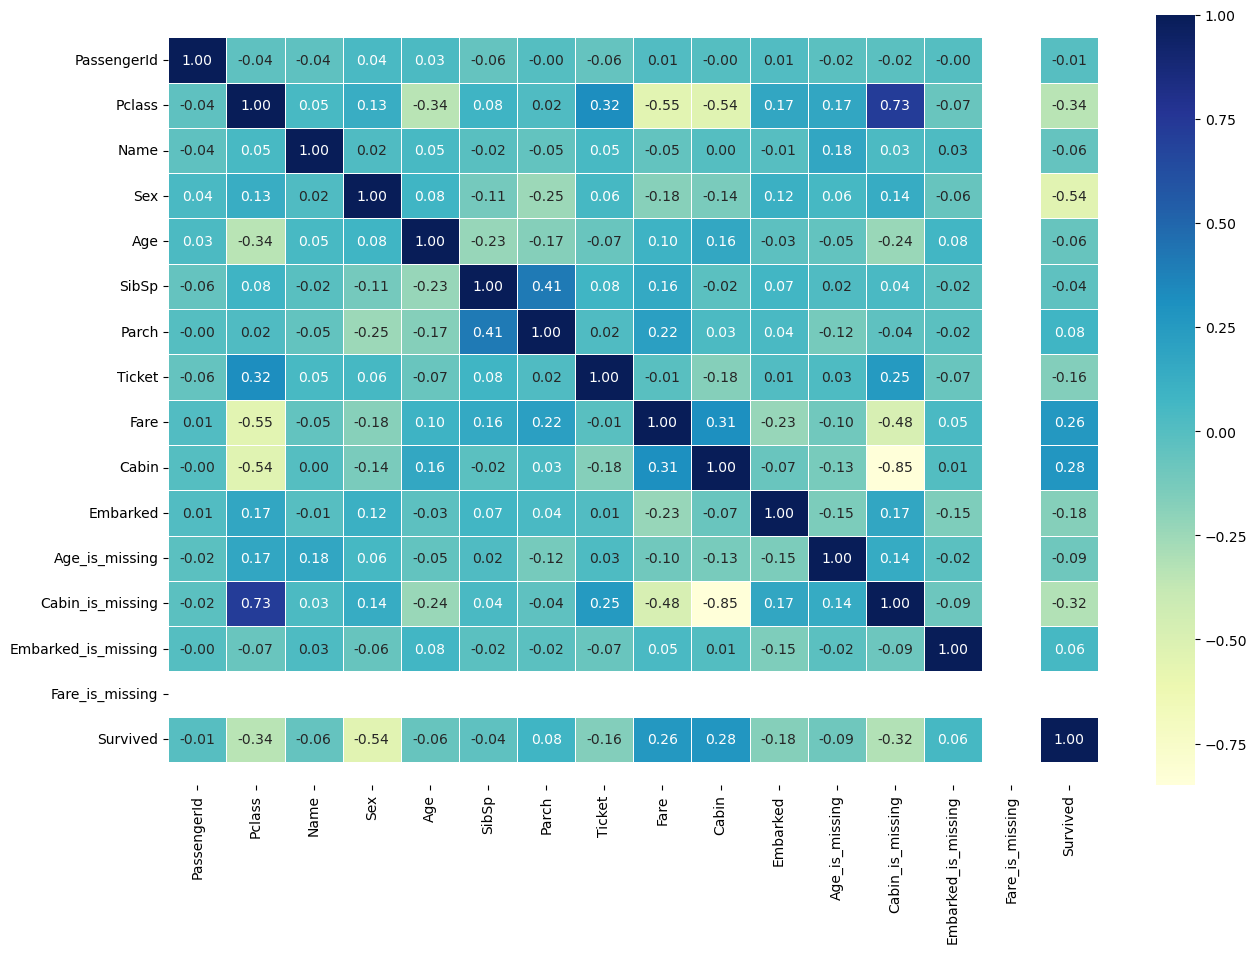

In [239]:
# Let's make our correlation matrix a little prettier
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(matrix_corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [242]:
# Set the correlation threshold
correlation_threshold = 0.3

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(matrix_corr.columns)):
    for j in range(i):
        if abs(matrix_corr.iloc[i, j]) > correlation_threshold:
            colname = matrix_corr.columns[i]
            highly_correlated_features.add(colname)

In [243]:
highly_correlated_features

{'Age', 'Cabin', 'Cabin_is_missing', 'Fare', 'Parch', 'Survived', 'Ticket'}

In [246]:
corr_with_target = df.corrwith(df_train_copy["Survived"]).abs().sort_values(ascending = False)

In [247]:
corr_with_target
# doesent work well for my case here

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
dtype: float64

In [249]:
matrix_corr["Survived"]

PassengerId           -0.005007
Pclass                -0.338481
Name                  -0.057343
Sex                   -0.543351
Age                   -0.064910
SibSp                 -0.035322
Parch                  0.081629
Ticket                -0.164549
Fare                   0.257307
Cabin                  0.276235
Embarked              -0.176509
Age_is_missing        -0.092197
Cabin_is_missing      -0.316912
Embarked_is_missing    0.060095
Fare_is_missing             NaN
Survived               1.000000
Name: Survived, dtype: float64

In [261]:
correlation_threshold = 0.1
highly_correlated_features = set()
for i in range(len(matrix_corr)):
    if abs(matrix_corr["Survived"].iloc[i]) > correlation_threshold:
        highly_correlated_features.add(matrix_corr["Survived"].index[i])

In [262]:
highly_correlated_features

{'Cabin',
 'Cabin_is_missing',
 'Embarked',
 'Fare',
 'Pclass',
 'Sex',
 'Survived',
 'Ticket'}

In [266]:
new_train_data = df_train_copy.loc[:,highly_correlated_features]
new_train_data.head()

,Sex,Ticket,Cabin,Fare,Cabin_is_missing,Embarked,Pclass,Survived
0,2,524,0,7.2500,1,3,3,0
1,1,597,82,71.2833,0,1,1,1
2,1,670,0,7.9250,1,3,3,1
3,1,50,56,53.1000,0,3,1,1
4,2,473,0,8.0500,1,3,3,0


In [274]:
fixed_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing,Fare_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,True,False,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,True,False,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,True,False,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,True,False,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,True,True,False,False
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,False,False,False,False
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,False,True,False,False
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,True,True,False,False


In [ ]:
highly_correlated_features.remove("Survived")

In [275]:

new_test_data = fixed_test.loc[:,highly_correlated_features]

In [276]:
new_test_data.head()

,Sex,Ticket,Cabin,Fare,Cabin_is_missing,Embarked,Pclass
0,2,153,0,7.8292,True,2,3
1,1,222,0,7.0000,True,3,3
2,2,74,0,9.6875,True,2,2
3,2,148,0,8.6625,True,3,3
4,1,139,0,12.2875,True,3,3


In [272]:
highly_correlated_features

{'Cabin', 'Cabin_is_missing', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Ticket'}

## now that we've got our data ready let's use XGboost to train our model

In [277]:
x_train,y_train = new_train_data.drop("Survived", axis = 1), new_train_data["Survived"]
# Create an XGBoost classifier object
xgb_clf = xgb.XGBClassifier(random_state=42)

In [279]:
param_dist = {'n_estimators': np.arange(10,2000,10),
              'max_depth': np.arange(3,25,2),
              'learning_rate': [0.01],
              'gamma': [0],
              'subsample': [0.5, 0.7, 0.9, 1],
              'colsample_bytree': np.arange(0.5,1,0.01),
              'min_child_weight': np.arange(1,15,1)}

In [280]:
xgb_rs = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=300, cv=5, random_state=42,n_jobs = -1,verbose = True)

In [281]:
%%time
xgb_rs.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
CPU times: total: 6.64 s
Wall time: 5min 3s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 146

In [282]:
xgb_rs.best_params_

{'subsample': 0.9,
 'n_estimators': 1760,
 'min_child_weight': 6,
 'max_depth': 23,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.9900000000000004}

In [283]:
y_pred_xgb = xgb_rs.predict(new_test_data)

In [284]:
y_pred_xgb

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [285]:
resulted_df_xgb = pd.DataFrame({"PassengerId":fixed_test["PassengerId"],
                           "Survived":y_pred_xgb})
resulted_df_xgb.to_csv("./data/Titanic_Survival_predctions_xgb_feat_1.csv",index = False)